## For PCA final figure

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib
import analysis_pca

Ts = 1000
data_path = r'/home/jb/Desktop/work/python_code'
save_path = r'/home/jb/Desktop/work/figure'

In [2]:
#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()
PCA_total = apca.pca_analy(data_cat_sm)


# PCA to PCA

PCA_total2 = apca.pca_to_pca(PCA_total, 4)

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.24%
Dimens

In [3]:
# PCA to PCA

pca_data = []
for a in range(8):
    temp = PCA_total[a]['p']
    temp = temp[:,:4]
    pca_data.append(temp)

pca_data = np.array(pca_data)
pca_data = np.concatenate(pca_data, axis = 1)

## For behavior task figure

In [4]:
ori_templet=np.load('ori_templet.npy', allow_pickle=True)

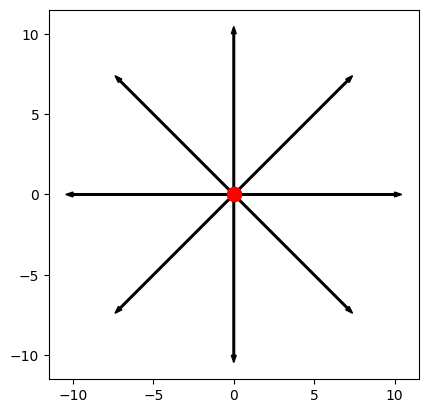

In [5]:
for a in range(8):

    plt.arrow(
        x=0, y=0,
        dx=ori_templet[a, 0], dy=ori_templet[a, 1],
        width=0.1,
        head_width=0.3,
        overhang=0,
        facecolor='black')

plt.axis('square')

plt.scatter([0, 0], [0, 0], s=100, color='r')
plt.savefig('raw.jpg', dpi=300)

## For raw data

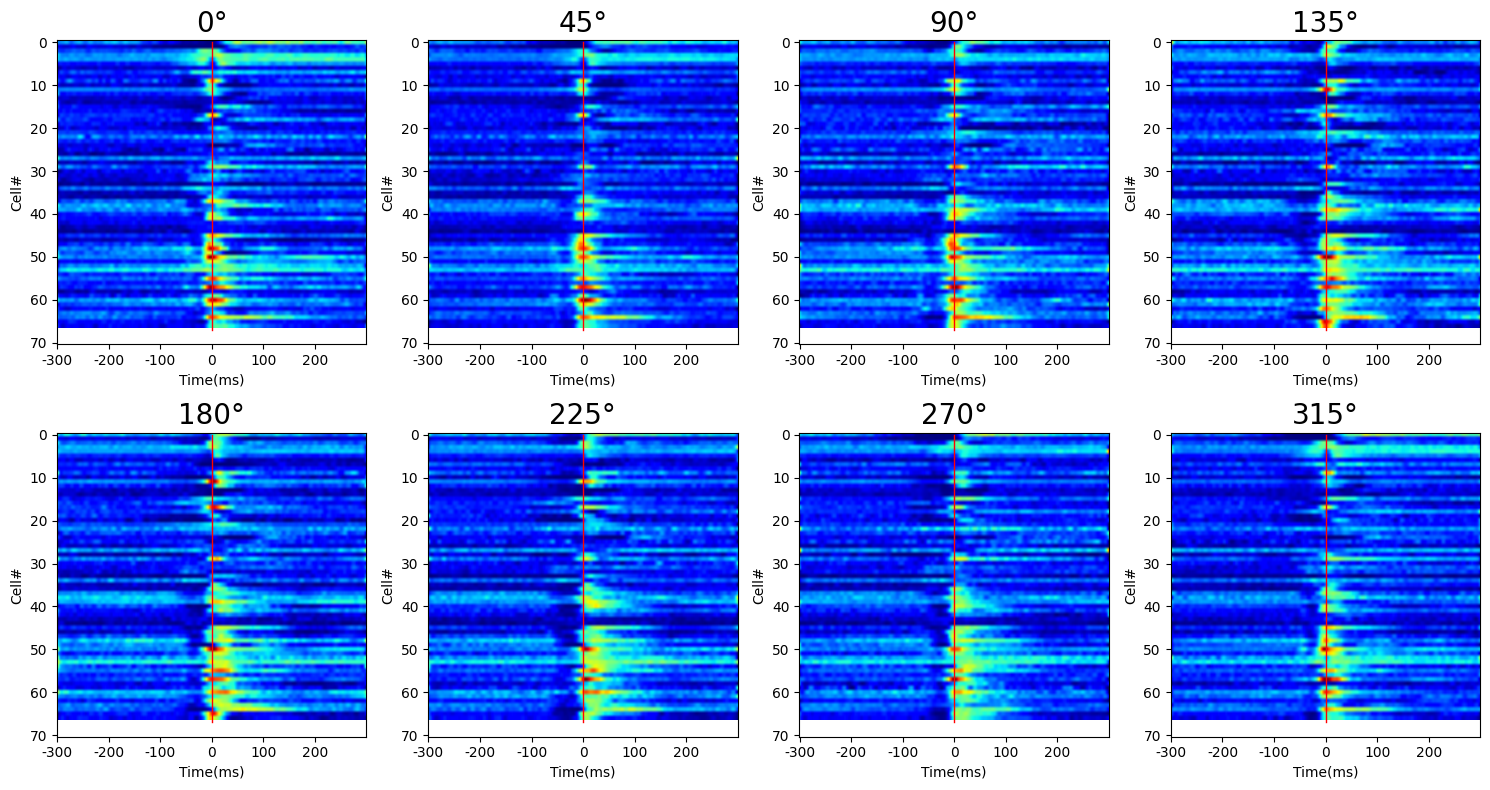

In [6]:
# Plotting raw data of each orientation

# label_ori = ['Right', 'Up right', 'Up', 'Up left',
#              'Left', 'Down left', 'Down', 'Down right']

import math

label_ori = []
for a in np.linspace(0, 360, 9):
    ss = math.trunc(a)
    temp = f'{ss}\N{DEGREE SIGN}'
    label_ori.append(temp)

label_ori = np.array(label_ori)
    
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# for a in range(8):
c = 0
for a in range(8): # right to down right, anticlock-wise
    ax = axes[a // 4, a % 4]  # Determine the subplot location
    ax.imshow(data_cat_sm[a], aspect='auto', cmap='jet', origin='upper')  # Display the data
    ax.plot([300, 300], [0, len(data_cat_sm[0])], 'r', linewidth=1)  # Red vertical line
    ax.set_xticks(np.arange(0, 600, 100))  # Set X ticks
    ax.set_xticklabels(np.arange(-300, 300, 100))  # Set X tick labels
    ax.set_title(label_ori[c], size=20)  # Set the title for each subplot
    ax.set_ylabel("Cell#")  # Set Y-axis label
    ax.set_xlabel("Time(ms)")  # Set X-axis label
    c = c + 1

plt.tight_layout()

plt.savefig('raw.jpg', dpi=300)
plt.show()

## For PCA results

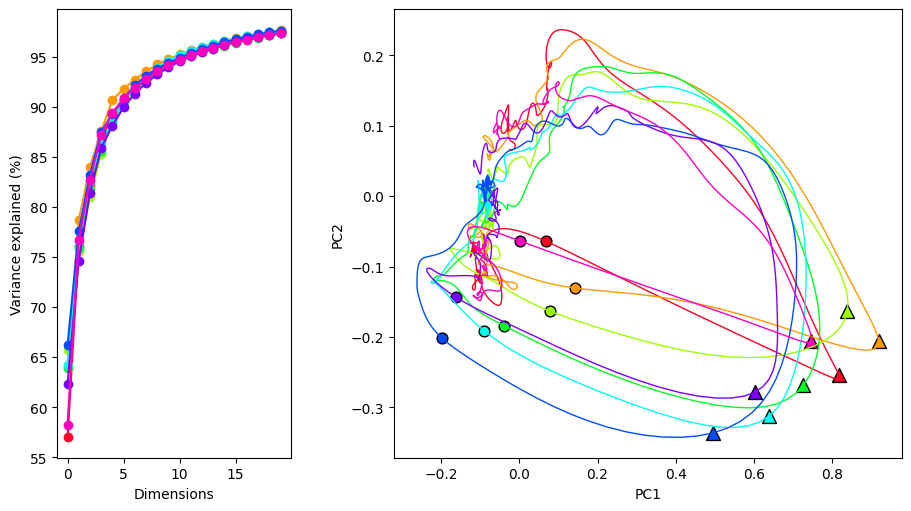

In [7]:
# Pretty figures1
from scipy.ndimage import gaussian_filter1d
win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

# rainbow color

cmap = matplotlib.colormaps.get_cmap("gist_rainbow")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

# color = np.array([255, 0, 0,
#                  255, 127, 0,
#                  255, 255, 0,
#                  0, 255, 0,
#                  0, 0, 255,
#                  75, 0, 130,
#                  148, 0, 211,
#                  0, 0, 0])
# color = color / 255
# color = color.reshape(8,3)


fig = plt.figure(constrained_layout=True,figsize=(9,5))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[2, 4])

#pca
subfigs[1].subplots(1, 1)
for ori in range(8):
   
    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]

    # plt.scatter(X, Y, s=10, color=C_list[ori], marker='o')
    plt.plot(X[50:500], Y[50:500], linewidth=1.0, color=C_list[ori])
    # plt.scatter(X[280], Y[280], s=200, color=[0, 0, 0], facecolors='none')
    plt.scatter(X[280], Y[280], s=60, color = C_list[ori], facecolors=C_list[ori], edgecolors='black')
    plt.scatter(X[300], Y[300], marker='^', s=100, color = C_list[ori], edgecolors='black')
    
plt.xlabel('PC1')
plt.ylabel('PC2')
    # zlabel('PC3')

#variance explained
subfigs[0].subplots(1, 1)
for ori in range(8): # right to down right, anticlock-wise
    dd = PCA_total[ori]['dd']

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100

    # Plot variance explained
    plt.plot(var_explained[:20], 'o-', label="Cumulative variance explained", color = C_list[ori])
    plt.xlabel('Dimensions')
    plt.ylabel('Variance explained (%)')

plt.savefig('pc1.jpg', dpi=300)

plt.show()

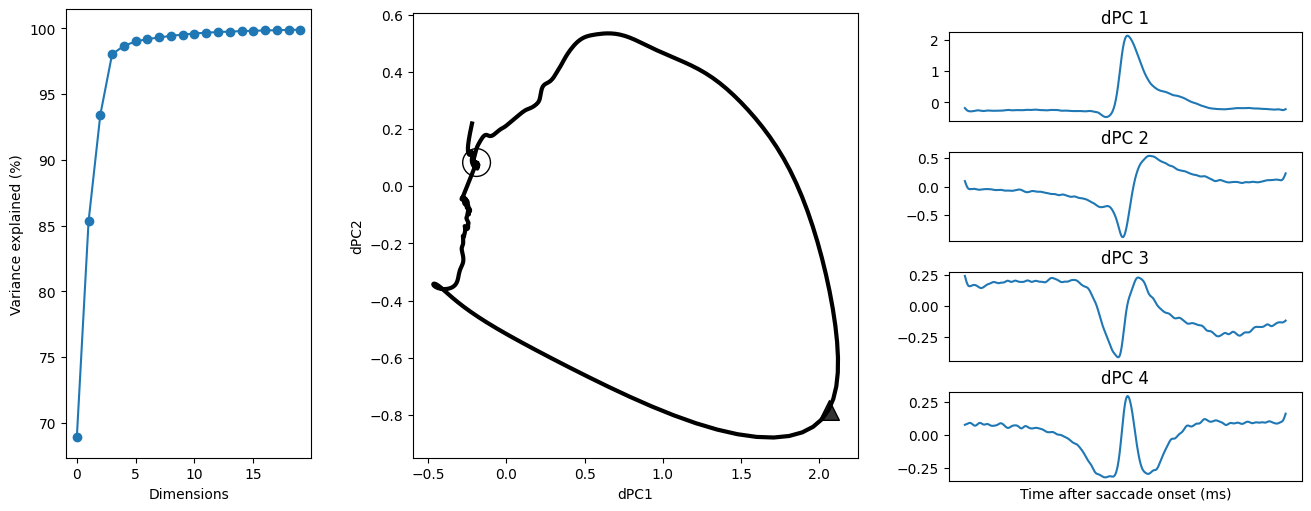

In [8]:
# Pretty figures2
# from matplotlib.markers import CARETUP

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[3, 5, 4])

# Plot variance explained
subfigs[0].subplots(1, 1)
dd = PCA_total2['dd']
var_explained = np.cumsum(dd) * 100
plt.plot(var_explained[:20], 'o-')
plt.xlabel('Dimensions')
plt.ylabel('Variance explained (%)')
# plt.title('Variance Explained')

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()


# Plot dPCA
subfigs[1].subplots(1, 1)

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
temp_PC = PCA_total2['p'].T

s_temp1 = gaussian_filter1d(temp_PC[0], win)
s_temp2 = gaussian_filter1d(temp_PC[1], win)
s_temp3 = gaussian_filter1d(temp_PC[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

# plt.scatter(X, Y, s=10, color = [0, 0, 0], marker='o')
plt.plot(X, Y, linewidth=3.0, color = [0, 0, 0])
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none')
plt.scatter(X[300], Y[300], marker='^', s=200, color = [0, 0, 0], facecolor = [0.2, 0.2, 0.2])
plt.xlabel('dPC1')
plt.ylabel('dPC2')
# zlabel('PC3')

# plt.rc('font', size=25)

# Plot the principal component time series (scores)
subfigs[2].subplots(4, 1)

for i in range(4):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-300, 300), temp_PC[i, :600])  # Assuming 600 time steps
    ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
plt.xlabel('Time after saccade onset (ms)')
# plt.tight_layout()

plt.savefig('pc.jpg', dpi=300)

plt.show()

## Onset delay

In [21]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

val_cat = np.array(val_cat)[:,:8]
data_cat = np.array(data_cat)[:, :8]

C:\Users\IBS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


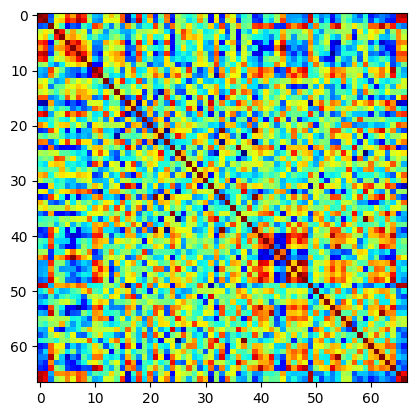

In [22]:
import preprecessing_distMat

pdm = preprecessing_distMat.preprecessing_distMat(Ts, data_cat, val_cat, save_path)
onset_delay = pdm.peak_delay(win=20)
p_t = pdm.peak_MDS(onset_delay, True)

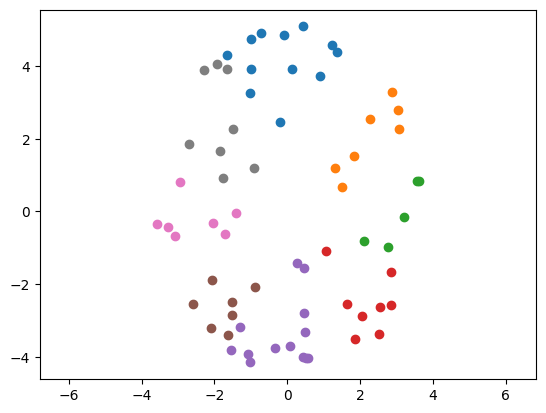

In [23]:
#Sorting cell by degree

from scipy.spatial import distance
from math import degrees

sp1 = np.argsort(p_t[:,1])[::-1][:5]
sp2 = np.argsort(np.abs(p_t[sp1, :][:, 0]))
sp = sp1[sp2[0]]

# p = p_t[sp]
cent = np.mean(p_t, axis=0)
p = [cent[0], cent[1] + 6]

deg_f = []
for a in range(len(p_t)):
    q = p_t[a]
    cos = 1-distance.cosine(p, q)
    deg = degrees(np.arccos(cos))
    if q[0] - p[0] < 0:
        deg = 360 - deg

    deg_f.append(deg)
deg_f = np.array(deg_f)

deg_idx = np.linspace(0, 360, 9) + 22.5
deg_idx = np.append(deg_idx[7], deg_idx[:7])

C_cat = []
for a in range(len(deg_idx)):
    if a == 0:
        C = np.where(np.logical_or(deg_f > deg_idx[a], deg_f <= deg_idx[a+1]))
    elif a == 7:
        C = np.where(np.logical_and(deg_f > deg_idx[a], deg_f <= deg_idx[0]))
    else:
        C = np.where(np.logical_and(deg_f > deg_idx[a], deg_f <= deg_idx[a+1]))
    C_cat.append(C)

# plotting
for a in range(8):
    plt.scatter(p_t[[C_cat[a]],0], p_t[[C_cat[a]],1])
plt.axis('equal')

plt.savefig('pizza_plot.jpg', dpi=300)

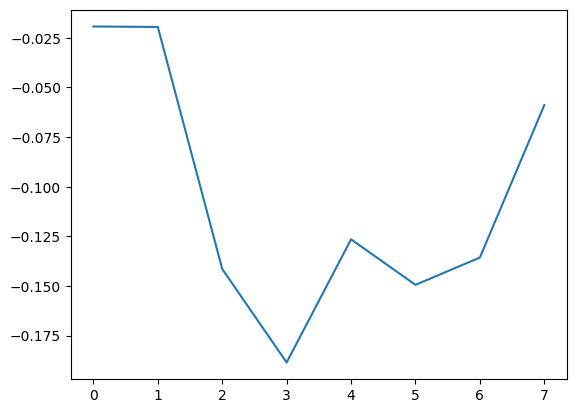

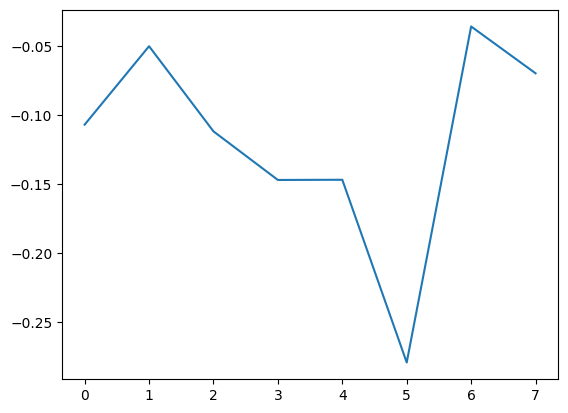

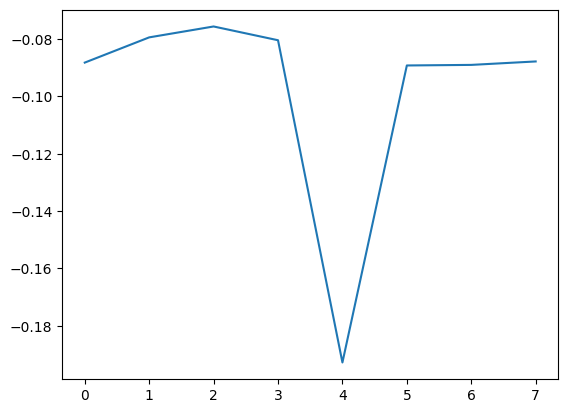

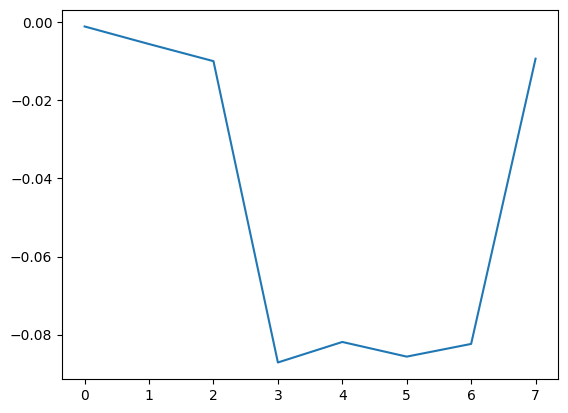

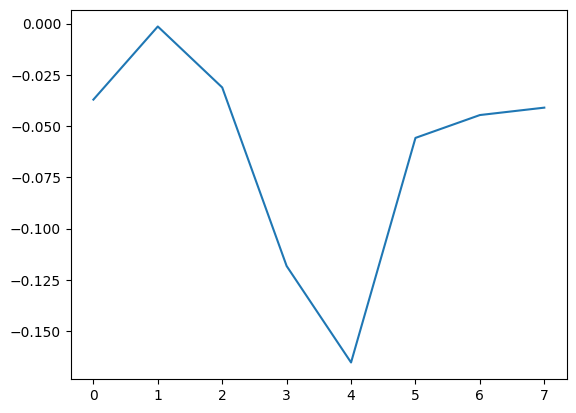

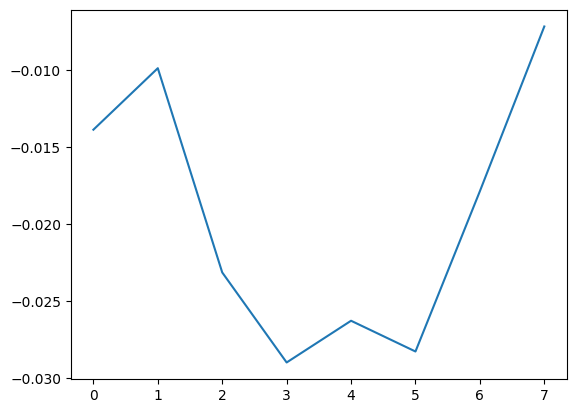

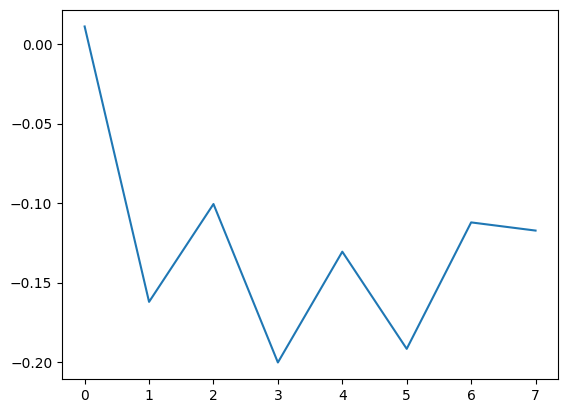

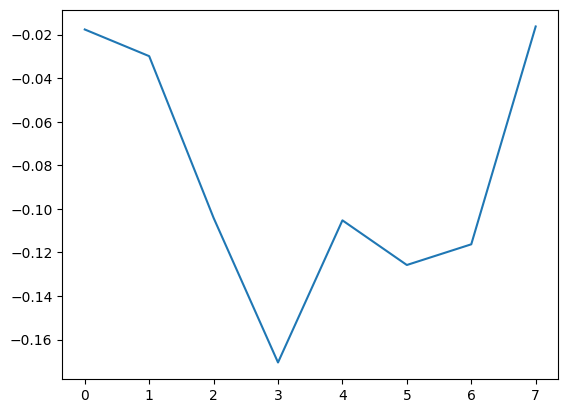

In [24]:
# Aligned data by latency

onset_delay_M = onset_delay[C_cat[0]]
for a in range(1,8):
    temp = onset_delay[C_cat[a]]
    temp2 = np.concat([temp[:,a:8], temp[:,:a]], axis=1)
    onset_delay_M = np.vstack([onset_delay_M, temp2])

idx_c =[0]
for a in range(8):
    idx_c.append(len(C_cat[a][0]))
idx_c = np.cumsum(idx_c)  

for a in range(8):
    plt.figure()
    plt.plot(np.mean(onset_delay_M[idx_c[a]:idx_c[a+1]], axis=0))

# Data align

data_cat2 = data_cat[C_cat[0]]
for a in range(1,8):
    temp = data_cat[C_cat[a]]
    temp2 = np.concat([temp[:,a:8], temp[:,:a]], axis=1)
    data_cat2 = np.vstack([data_cat2, temp2])

data_cat2 = np.hstack([data_cat2, data_cat2])  # put dummy for using analysis_pca code
data_cat2 = data_cat2[:,:9]

In [25]:
#For FN angle aligned PCA

apca = analysis_pca.analysis_pca(Ts, data_cat2, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [26]:
#For FN angle original PCA

data_cat = np.hstack([data_cat, data_cat])  # put dummy for using analysis_pca code
data_cat = data_cat[:,:9]
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm2 = apca.smoothing_data()  # Smoothed data
data2 = np.mean(data_cat_sm2, axis=0)  # Anagle averged data
PCA_total2 = apca.pca_analy(data2)  # PCA

Wa2 = PCA_total2['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [27]:
#Multiply weight matrix (MWM) to each angle data

final_out = []
for a in range(8):
    out = Wa @ data_cat_sm[a]
    final_out.append(out)

final_out = np.array(final_out)

In [28]:
#Multiply weight matrix (MWM) to each angle data2 (original)

final_out2 = []
for a in range(8):
    out = Wa2 @ data_cat_sm2[a]
    final_out2.append(out)

final_out2 = np.array(final_out2)

In [29]:
#Adjust MWM by subtract data point at -300 to -200ms

tmep_final = np.transpose(final_out,[2,0,1])
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :, :], 600, axis=0)
nfinal_out = np.transpose(tmep_final - sTemplet, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms

tmep_final = PCA_total['p']
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :], 600, axis=0)
nPCA_out = tmep_final.T - sTemplet.T

In [30]:
#Adjust MWM by subtract data point at -300 to -200ms (original)

tmep_final2 = np.transpose(final_out2,[2,0,1])
sTemplet2 = np.mean(tmep_final2[:100], axis=0)
sTemplet2 = np.repeat(sTemplet2[np.newaxis, :, :], 600, axis=0)
nfinal_out2 = np.transpose(tmep_final2 - sTemplet2, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms (original)

tmep_final2 = PCA_total2['p']
sTemplet2 = np.mean(tmep_final2[:100], axis=0)
sTemplet2 = np.repeat(sTemplet2[np.newaxis, :], 600, axis=0)
nPCA_out2 = tmep_final2.T - sTemplet2.T

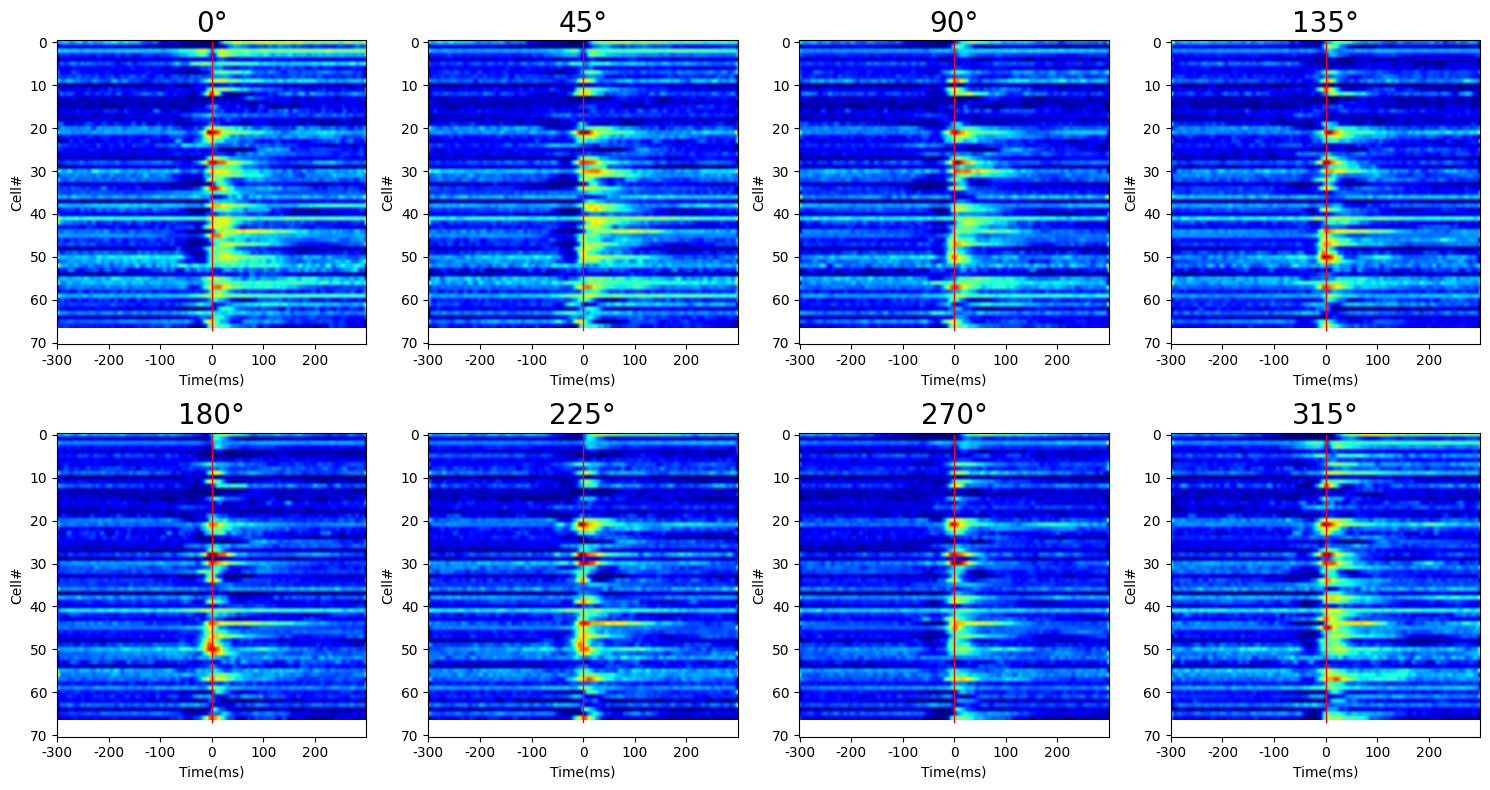

In [31]:
# Plotting raw data of each orientation
# label_ori = ['Up', 'Up right', 'Right', 'Down right',
#              'Down', 'Down left', 'Left', 'Up left']

import math

label_ori = []
for a in np.linspace(0, 360, 9):
    ss = math.trunc(a)
    temp = f'{ss}\N{DEGREE SIGN}'
    label_ori.append(temp)

label_ori = np.array(label_ori)

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

c = 0
for a in range(8):
# for a in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    ax = axes[a // 4, a % 4]  # Determine the subplot location
    ax.imshow(data_cat_sm[a], aspect='auto', cmap='jet', origin='upper')  # Display the data
    ax.plot([300, 300], [0, len(data_cat_sm[0])], 'r', linewidth=1)  # Red vertical line
    ax.set_xticks(np.arange(0, 600, 100))  # Set X ticks
    ax.set_xticklabels(np.arange(-300, 300, 100))  # Set X tick labels
    # ax.set_title(label_ori[c])  # Set the title for each subplot
    ax.set_title(label_ori[c], size=20)  # Set the title for each subplot
    ax.set_ylabel("Cell#")  # Set Y-axis label
    ax.set_xlabel("Time(ms)")  # Set X-axis label
    c = c + 1

plt.tight_layout()

plt.savefig('raw.jpg', dpi=300)
plt.show()

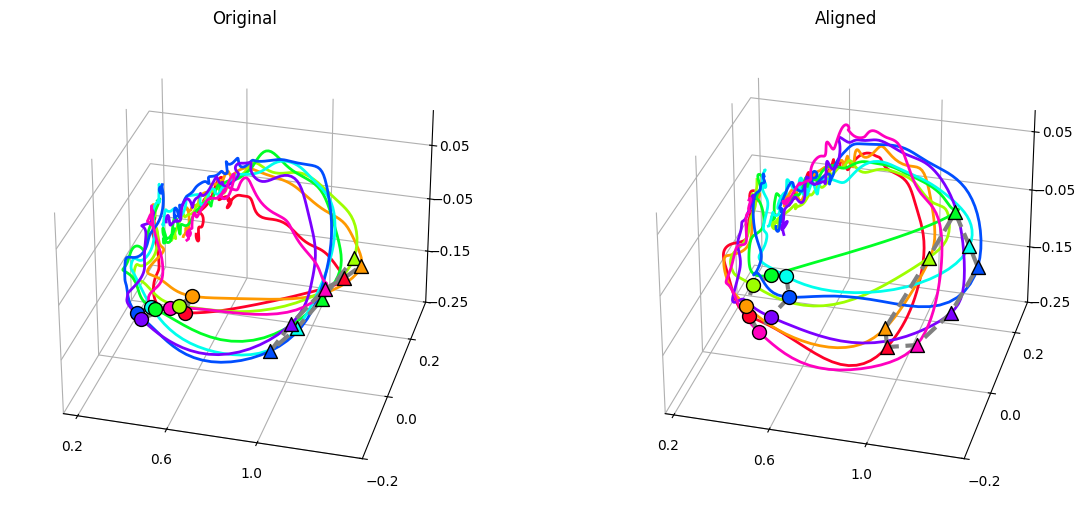

In [62]:
# Pretty figure

from matplotlib.markers import CARETUP
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# color map
cmap = matplotlib.colormaps.get_cmap("gist_rainbow")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

fig = plt.figure(constrained_layout=True,figsize=(12,5))
# subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1])

# 3D plot of angle original data

# subfigs[0].subplots(1, 1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
for a in range(8):
    X = final_out2[a, 0]; Y = final_out2[a, 1]; Z = final_out2[a, 2]
    ax.plot(X[200:500], Y[200:500], Z[200:500], label='parametric curve', color = C_list[a], linewidth = 2)
    
    ax.scatter(X[280], Y[280], Z[280], s=100, color = C_list[a], facecolors=C_list[a], edgecolors='black')
    ax.scatter(X[300], Y[300], Z[300], marker='^', s=100, color = C_list[a], facecolors = C_list[a], edgecolors='black')
X = final_out2[:, 0]; Y = final_out2[:, 1]; Z = final_out2[:, 2]
ax.plot(np.hstack([X[:, 280], X[0, 280]]),
        np.hstack([Y[:, 280], Y[0, 280]]),
        np.hstack([Z[:, 280], Z[0, 280]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)
ax.plot(np.hstack([X[:, 300], X[0, 300]]),
        np.hstack([Y[:, 300], Y[0, 300]]),
        np.hstack([Z[:, 300], Z[0, 300]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)


ax.set_title("Original")
# ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')


# 3D plot of angle aligned data

# subfigs[0].subplots(1, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for a in range(8):
    X = final_out[a, 0]; Y = final_out[a, 1]; Z = final_out[a, 2]
    ax2.plot(X[200:500], Y[200:500], Z[200:500], label='parametric curve', color = C_list[a], linewidth = 2)
    ax2.scatter(X[280], Y[280], Z[280], s=100, color = C_list[a], facecolors=C_list[a], edgecolors='black')
    ax2.scatter(X[300], Y[300], Z[300], marker='^', s=100, color = C_list[a], facecolors = C_list[a], edgecolors='black')
X = final_out[:, 0]; Y = final_out[:, 1]; Z = final_out[:, 2]
ax2.plot(np.hstack([X[:, 280], X[0, 280]]),
        np.hstack([Y[:, 280], Y[0, 280]]),
        np.hstack([Z[:, 280], Z[0, 280]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)
ax2.plot(np.hstack([X[:, 300], X[0, 300]]),
        np.hstack([Y[:, 300], Y[0, 300]]),
        np.hstack([Z[:, 300], Z[0, 300]]),
        ls = '--', color = [0.5, 0.5, 0.5], linewidth = 3)


ax2.set_title("Aligned")
# ax2.set_xlabel('1D'); ax2.set_ylabel('2D'); ax2.set_zlabel('3D')
# ax.set_axis_off()
ax.set_xticks(np.arange(0.2 , 1.4, 0.4))
ax.set_yticks(np.arange(-0.2 , 0.3, 0.2))
ax.set_zticks(np.arange(-0.25 , 0.1, 0.1))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.grid(False)

# ax2.set_axis_off()
ax2.set_xticks(np.arange(0.2 , 1.4, 0.4))
ax2.set_yticks(np.arange(-0.2 , 0.3, 0.2))
ax2.set_zticks(np.arange(-0.25 , 0.1, 0.1))
ax2.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax2.grid(False)

# animation
def run(frame_number):
    ax.view_init(azim=225 + frame_number*2)
    ax2.view_init(azim=225 + frame_number*2)

# rotation figure
run(30)
# plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.savefig('3d plot.jpg', dpi=300)
plt.show()

# make animation
# anim = FuncAnimation(fig, run, frames=180, interval=20)
# HTML(anim.to_jshtml())
# anim.save('scatter.gif', writer='imagemagick', fps=25, dpi=80)




In [63]:
import roundness

X = final_out2[:, 0]; Y = final_out2[:, 1]; Z = final_out2[:, 2]
r_data = np.array([X[:, 280], Y[:, 280], Z[:, 280]]).T
r1 = roundness.roundness(r_data)

r_data = np.array([X[:, 300], Y[:, 300], Z[:, 300]]).T
r2 = roundness.roundness(r_data)

X = final_out[:, 0]; Y = final_out[:, 1]; Z = final_out[:, 2]
r_data = np.array([X[:, 280], Y[:, 280], Z[:, 280]]).T
r3 = roundness.roundness(r_data)

X = final_out[:, 0]; Y = final_out[:, 1]; Z = final_out[:, 2]
r_data = np.array([X[:, 300], Y[:, 300], Z[:, 300]]).T
r4 = roundness.roundness(r_data)

rr = np.round([r1, r2, r3, r4], 2)

In [64]:
rr

array([0.65, 0.56, 0.82, 0.79])